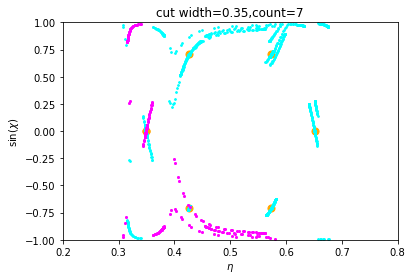

In [1]:
%matplotlib inline
import dynamical_barrier as db
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tnrange,tqdm
a=3.
b=4.8
a1=3.
b1=1.945
c=0.9
k = np.sqrt(np.absolute(a**2-b**2))
focdist=0.35
cut_angle=np.pi/2.
Penrose=db.geometry(a,b,a1,b1,c,focdist,cut_angle)
def reflections(irayset,count):
    for j in range(count):
        for i in range(0,len(irayset),1):
            fray=Penrose.reflected_ray(irayset[i])
            for m in range(4):
                irayset[i][m]=fray[m]
    return irayset
def new_triple(dataset):
    rayset=Penrose.IC_real(dataset)
    label=np.ones(len(rayset))
    DB_original=[]
    for i in range(len(rayset)):
        ang_diff=Penrose.nangle_pt(rayset[i][0],rayset[i][1],rayset[i][3])-rayset[i][2]
        DB_original.append(Penrose.Dynamical_Barrier(rayset[i][0],rayset[i][1],ang_diff,rayset[i][3]))
    DB=np.zeros(len(rayset))
    for j in range(Nmax):
        index=[]
        frayset=reflections(rayset,reflection_number)
        for i in range(len(rayset)):
            fang_diff=Penrose.nangle_pt(frayset[i][0],frayset[i][1],frayset[i][3])-frayset[i][2]
            DB[i]=Penrose.Dynamical_Barrier(frayset[i][0],frayset[i][1],fang_diff,frayset[i][3])
            if (DB[i]!=DB_original[i] and label[i]==1 and DB_original[i]==1):
                index.append(i)
                label[i]=label[i]-1
            for m in range(4):
                rayset[i][m]=frayset[i][m]
        if(len(index)==1):
            break
        else:
            index=np.arange(triple_count)
    if(index[0]>0 and index[0]<len(rayset)-1):
        result=[np.array(dataset[index[0]-1]),np.array(dataset[index[0]]),np.array(dataset[index[0]+1]),index[0]]
    elif(index[0]==0):
        result=[np.array(dataset[index[0]]),np.array(dataset[index[0]+1]),np.array(dataset[index[0]+2]),index[0]]
    elif(index[0]==len(rayset)-1):
        result=[np.array(dataset[index[0]-2]),np.array(dataset[index[0]-1]),np.array(dataset[index[0]]),index[0]]
    return result

def DBcolor(DB):
    if DB==1:
        return 'r'
    if DB==2:
        return 'b'
    if DB==3:
        return 'g'
    if DB==4:
        return 'k'
def reduce_size(dataset):
    triple=new_triple(dataset)
    while(np.abs(dataset[-1][0]-dataset[0][0])>0.005 or np.abs(dataset[-1][1]-dataset[0][1])>0.005):
        dataset=[triple[0]+i/triple_count*(triple[2]-triple[0]) for i in range(triple_count)]
        triple=new_triple(dataset)
    if (triple[3]==0):
        return dataset,triple[0]
    elif(triple[3]==len(dataset)-1):
        return dataset,triple[2]
    else:
        return dataset,triple[1]
def Reflection(dataset,reflection_number):
    if(reflection_number>0):
        irayset=Penrose.IC_real(dataset)
        fdataset=[]
        frayset=reflections(irayset,reflection_number)
        for i in range(len(frayset)):
            fang_diff=Penrose.nangle_pt(frayset[i][0],frayset[i][1],frayset[i][3])-frayset[i][2]
            data=[Penrose.eta(frayset[i][0],frayset[i][1],frayset[i][3])/Penrose.eta(6,0,14),np.sin(fang_diff)]
            fdataset.append(np.array(data))
        return np.array(fdataset)
    else:
        dataset.T[1]=-dataset.T[1]
        irayset=Penrose.IC_real(dataset)
        fdataset=[]
        frayset=reflections(irayset,-reflection_number)
        for i in range(len(frayset)):
            fang_diff=Penrose.nangle_pt(frayset[i][0],frayset[i][1],frayset[i][3])-frayset[i][2]
            data=[Penrose.eta(frayset[i][0],frayset[i][1],frayset[i][3])/Penrose.eta(6,0,14),np.sin(fang_diff)]
            fdataset.append(np.array(data))
        fdataset=np.array(fdataset)
        fdataset.T[1]=-fdataset.T[1]
        return fdataset 

fixed_iray=[-0.9,b**2/np.sqrt(a**2+b**2),np.pi,9]
init_ang_diff=0
fixed_idata=[Penrose.eta(fixed_iray[0],fixed_iray[1],fixed_iray[3])/Penrose.eta(0,0,14),np.sin(init_ang_diff)]
fixed_idata=Reflection(np.array([np.array(fixed_idata)]),0)
epsilon=0.00001
Dx=fixed_idata[0][0]
yx=fixed_idata[0][1]
fixed_manifold=[]
fixed_manifold.append(fixed_idata[0])
for j in range(6):
    fixed_fdata=Reflection(fixed_idata,-1)
    fixed_manifold.append(fixed_fdata[0])
    fixed_idata=fixed_fdata
fixed_manifold=np.array(fixed_manifold)

def reflection(dataset,reflection_number):
    if(reflection_number>0):
        print('working')
        irayset=Penrose.IC_real(dataset)
        fdataset=[]
        frayset=reflections(irayset,reflection_number)
        for i in range(len(frayset)):
            fang_diff=Penrose.nangle_pt(frayset[i][0],frayset[i][1],frayset[i][3])-frayset[i][2]
            data=[Penrose.eta(frayset[i][0],frayset[i][1],frayset[i][3])/Penrose.eta(6,0,14),np.sin(fang_diff)]
            fdataset.append(np.array(data))
            dist=np.sqrt((data[0]-Dx)**2+(data[1]-yx)**2)
            if(dist<epsilon):
                print(i)
        return np.array(fdataset)
    else:
        print('working')
        dataset.T[1]=-dataset.T[1]
        irayset=Penrose.IC_real(dataset)
        fdataset=[]
        frayset=reflections(irayset,-reflection_number)
        for i in range(len(frayset)):
            fang_diff=Penrose.nangle_pt(frayset[i][0],frayset[i][1],frayset[i][3])-frayset[i][2]
            data=[Penrose.eta(frayset[i][0],frayset[i][1],frayset[i][3])/Penrose.eta(6,0,14),np.sin(fang_diff)]
            fdataset.append(np.array(data))
            dist=np.sqrt((data[0]-Dx)**2+(-data[1]-yx)**2)
            if(dist<epsilon):
                print(i)
        fdataset=np.array(fdataset)
        fdataset.T[1]=-fdataset.T[1]
        return fdataset            
    
# epsilonlist=[0.0001/np.power(2,i) for i in range(20)]
epsilonlist=[0.001/np.power(10,m) for m in range(10)]
temp=[]
tempcount=int(1e2)
for j in range(len(epsilonlist)):
    temp=temp+[np.array([Dx+epsilonlist[j]*np.cos(2*np.pi/tempcount*i),yx+epsilonlist[j]*np.sin(2*np.pi/tempcount*i)]) for i in range(tempcount)]
sdataset=np.array(temp)
stemp=[]
for j in tnrange(7):
    stemp=stemp+[np.array([sdataset[i] for i in range(len(sdataset))])]
    fsdataset=Reflection(sdataset,-1)
    sdataset=fsdataset
stemp=np.array(stemp)
udataset=np.array(temp)
udataset2=np.array(temp)
udataset=Reflection(udataset,6)
udataset2=Reflection(udataset2,6)
fig,ax=plt.subplots()
ax.scatter(fixed_manifold.T[0],fixed_manifold.T[1],s=50,facecolors='orange')
ax.scatter(stemp.T[0],stemp.T[1],s=3,facecolors='cyan')
ax.scatter(udataset.T[0],udataset.T[1],s=3,facecolors='magenta')
# ax.scatter(sdataset2.T[0],sdataset2.T[1],s=3,facecolors='cyan')
ax.scatter(udataset2.T[0],udataset2.T[1],s=3,facecolors='magenta')
ax.set_title('cut width=%.2f,count=%d' % (focdist,len(fixed_manifold)))
ax.set_xlim(0.2,0.8)
ax.set_ylim(-1.0,1.0)
ax.set_xlabel('$\eta$')
ax.set_ylabel('$\sin(\chi)$')
plt.show()